In [2]:
# %cd Birth_CDC/
%ls

 Volume in drive C has no label.
 Volume Serial Number is 4CD3-B1F1

 Directory of C:\Users\AMOS OSHIYOYE\Documents\VSCODE_user_files\py

12/27/2022  01:48 AM               591 #first_work.py
03/13/2023  09:35 PM    <DIR>          .
03/13/2023  09:35 PM    <DIR>          ..
03/11/2023  12:47 AM    <DIR>          .ipynb_checkpoints
12/27/2022  01:48 AM    <DIR>          1_DShit
03/13/2023  09:35 PM            59,431 birth_learn.ipynb
12/27/2022  01:48 AM            49,675 first jupyter file.py.ipynb
02/21/2023  12:57 AM            52,975 pres_df.ipynb
03/11/2023  12:13 AM           101,792 titanic_first_work.ipynb
12/27/2022  01:48 AM            14,536 Untitled.ipynb
02/27/2023  10:39 PM                72 Untitled1.ipynb
02/28/2023  10:19 PM             1,829 Untitled2.ipynb
03/11/2023  12:46 AM             6,862 Untitled3.ipynb
12/27/2022  01:48 AM               950 wine_de.py
12/27/2022  01:48 AM           102,551 winequality-red.csv
12/27/2022  01:48 AM             1,533 winequality-

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
birth = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [5]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [111]:
new_birth['month_name']=[months_arr[a] for a in new_birth['month']]

C:\Users\AMOS OSHIYOYE\AppData\Local\Temp\ipykernel_5952\3652837518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_birth['month_name']=[months_arr[a] for a in new_birth['month']]


In [112]:
months_arr

{1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'Jun',
 7: 'Jul',
 8: 'Aug',
 9: 'Sep',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [7]:
for a,b in birth.groupby('gender')['births']:
    print(f'{a}":"{b.count()}')

F":"7776
M":"7771


In [8]:
len(birth[birth['gender']=='F'])

7776

In [9]:
decade=10*(birth['year']//10)
decade=decade.astype('str')+'s'
decade.name='decade'
birth['decade']=decade

In [10]:
birth.pivot_table('births',index='decade', columns='gender',aggfunc=np.sum)


gender,F,M
decade,,
1960s,1753634,1846572
1970s,16263075,17121550
1980s,18310351,19243452
1990s,19479454,20420553
2000s,18229309,19106428


In [13]:
quartiles = np.percentile(birth['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [14]:
quartiles

array([4358. , 4814. , 5289.5])

In [16]:
sig

689.31

In [18]:
birth.isnull().any()

year      False
month     False
day        True
gender    False
births    False
decade    False
dtype: bool

In [22]:
birth.loc[birth['day'].isnull()].describe()

,year,month,day,births
count,480.000000,480.000000,0.0,480.000000
mean,1998.500000,6.500000,NaN,169336.327083
std,5.772297,3.455654,NaN,9860.005609
min,1989.000000,1.000000,NaN,142259.000000
25%,1993.750000,3.750000,NaN,162788.500000
50%,1998.500000,6.500000,NaN,169526.500000
75%,2003.250000,9.250000,NaN,176078.000000
max,2008.000000,12.000000,NaN,199622.000000


In [25]:
new_birth=birth.dropna()

In [30]:
new_birth.loc[new_birth['day']>31]

,year,month,day,gender,births,decade
62,1969,1,99.0,F,26,1960s
63,1969,1,99.0,M,38,1960s
126,1969,2,99.0,F,42,1960s
127,1969,2,99.0,M,48,1960s
190,1969,3,99.0,F,64,1960s
...,...,...,...,...,...,...
14572,1988,4,99.0,F,1,1980s
14635,1988,5,99.0,F,1,1980s
14696,1988,6,99.0,F,1,1980s
14697,1988,6,99.0,M,1,1980s


In [109]:
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
months_arr={a+1:b for a,b in enumerate(months)}
    

In [110]:
months_arr

{1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'Jun',
 7: 'Jul',
 8: 'Aug',
 9: 'Sep',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [65]:
new_birth.groupby(['month','gender'])['births'].sum()

month  gender
1      F         2810078
       M         2949490
2      F         2616914
       M         2746503
3      F         2859813
       M         3008838
4      F         2706556
       M         2854761
5      F         2813046
       M         2972556
6      F         2798479
       M         2960754
7      F         3026280
       M         3194497
8      F         3075596
       M         3234680
9      F         3029496
       M         3177289
10     F         2956098
       M         3100095
11     F         2776740
       M         2919295
12     F         2884252
       M         3020835
Name: births, dtype: int64

Text(0, 0.5, 'Sum of birth by month')

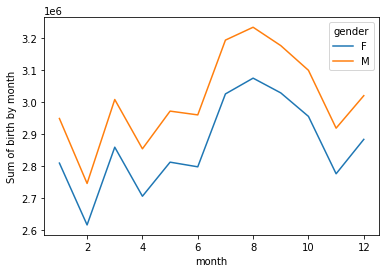

In [121]:
new_birth.pivot_table('births',index='month',columns='gender',aggfunc=sum).plot()
plt.gca().xticklabels=months
plt.ylabel('Sum of birth by month')

Text(0, 0.5, 'total births per year')

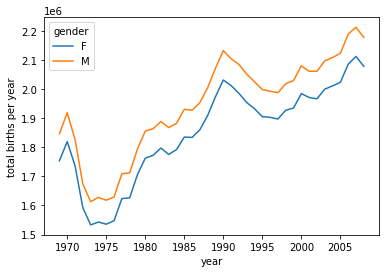

In [114]:
birth.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()

plt.ylabel('total births per year')

In [49]:
new_birth['births'].sum()

70492941